# PROJECT PROPOSAL GROUP 17

## Title/ Inferential Question

### Introduction

-insert intro here-
ie. What is the mean cholesterol level in men and women diagnosed with heart disease?

MY ANSWER(MAYBE YOU GUYS CAN CUT OUT THE PARTS YOU THINK ARE NOT NECESSARY,I THINK I WROTE ALOT OF UNNECESSARY STUFF)


Title: "Gender Differences in Cholesterol Levels among Individuals Diagnosed with Heart Disease: A Statistical Analysis of the Cleveland Heart Disease Dataset"


Introduction:
Cholesterol is a critical biomarker that plays a significant role in cardiovascular health. Heart disease, also known as cardiovascular disease, is a leading cause of morbidity and mortality globally. It is well-established that elevated cholesterol levels are associated with an increased risk of heart disease. Therefore, understanding the cholesterol levels in individuals diagnosed with heart disease can provide valuable insights into potential risk factors and gender-specific patterns that may contribute to the development of this condition.

Question and Parameters of Interest:
The main question we aim to answer with this project is: "What are the mean cholesterol levels in men and women diagnosed with heart disease, and are there any significant gender differences?"

For this analysis, we will consider cholesterol level as our random variable of interest, and it will be spread across two categories: men and women. We will focus on the location parameter, which is the mean cholesterol level, to understand the central tendency of cholesterol in these two groups. Additionally, we will investigate the scale parameter, represented by the standard deviation, to explore the variability of cholesterol levels within each group.


Dataset Description:
To conduct our analysis, we will use the "Cleveland Heart Disease Dataset," obtained from a reputable source (URL provided). This dataset contains various attributes related to heart disease, such as age, sex, chest pain type, blood pressure, cholesterol level, fasting blood sugar, and more. We will focus on the variables "sex" and "cholesterol_level" for our investigation. While the dataset may contain additional variables, we will drop any irrelevant ones to streamline our analysis.

Data Analysis Approach:
Our data analysis will involve several steps. First, we will clean and tidy the dataset by selecting the relevant variables and transforming the "sex" variable to represent male (M) and female (F) categories for better interpretation.

Next, we will use a box plot (Figure 1) to visually compare the cholesterol levels between men and women diagnosed with heart disease. This initial exploration will provide an overview of the distribution and potential differences in cholesterol levels.

To obtain a more accurate estimate of the mean difference in cholesterol levels between genders, we will utilize bootstrapping. By creating resamples from the data and computing the mean difference for each resample, we can construct a bootstrap distribution (Table 2) that represents the variability in our estimate.

Furthermore, we will perform hypothesis testing to determine if there is a significant difference in mean cholesterol levels between men and women diagnosed with heart disease. Additionally, we will investigate the standard deviation to understand the spread of cholesterol levels within each group.


### Data Analysis

In [ ]:
#Load this before continuing
library(tidyverse)
library(digest)
library(infer)
library(repr)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [ ]:
#Reading data into R
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cleveland_heart <- read_csv(url)
head(cleveland_heart)

#Change column names to given varaibles from dataset

colnames(cleveland_heart) <- c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol_level", "fasting_blood_sugar", "resting_ecg_results", "maximum_heart_rate_achieved", "exercise_induced_angina", "oldpeak", "slope", "major_vessels_colored", "thal", "diagnosis")
head(cleveland_heart)

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


age,sex,chest_pain,resting_blood_pressure,cholesterol_level,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,major_vessels_colored,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


### Preliminary Results

In [ ]:
# Tidy data to relevant variables
cleveland_heart$sex <- as.character(cleveland_heart$sex)
cleveland_heart$sex[cleveland_heart$sex == "1"] <- "M"
cleveland_heart$sex[cleveland_heart$sex == "0"] <- "F"

prelim_tidy <- cleveland_heart %>%
    filter(!diagnosis == 0) %>%
    select(sex, cholesterol_level)

head(prelim_tidy)

sex,cholesterol_level
<chr>,<dbl>
M,286
M,229
F,268
M,254
M,203
M,256


*Table 1*

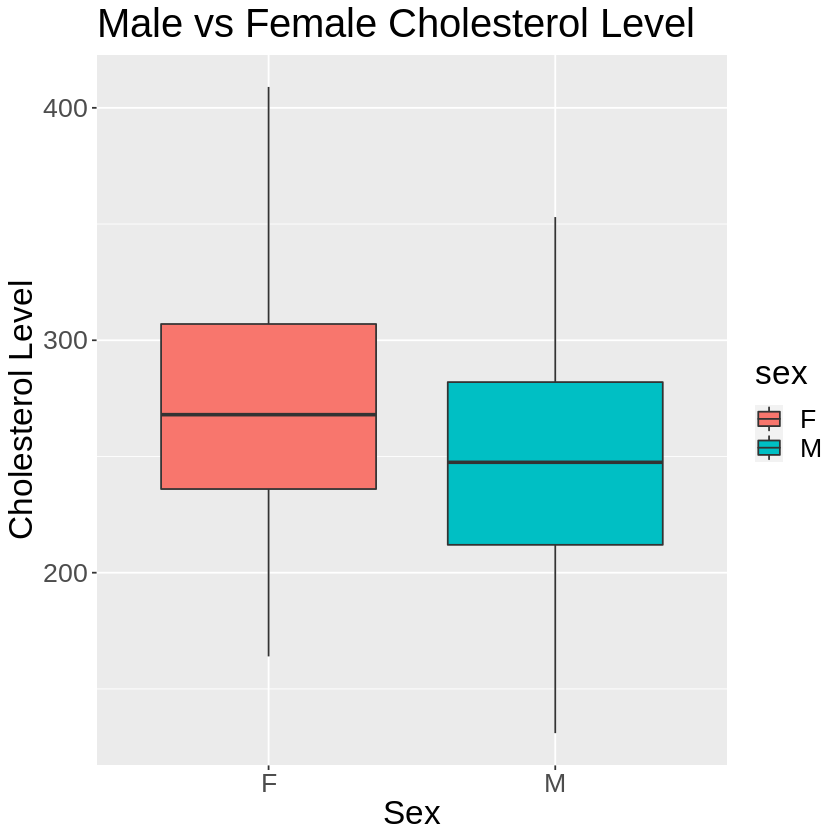

In [ ]:
# boxplot of raw data
box <- prelim_tidy %>%
    ggplot() +
        geom_boxplot(aes(x = sex, y = cholesterol_level, fill = sex)) +
        ggtitle("Male vs Female Cholesterol Level") +
        xlab("Sex") +
        ylab("Cholesterol Level") +
        theme(text = element_text(size = 20))

box

*Figure 1*

In [ ]:
# bootstrap tidied sample
btsp <- prelim_tidy %>%
    specify(formula = cholesterol_level ~ sex) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("F", "M"))

head(btsp)

replicate,stat
<int>,<dbl>
1,35.79602
2,10.96422
3,31.20978
4,19.24710
5,39.29621
6,13.98214


*Table 2*

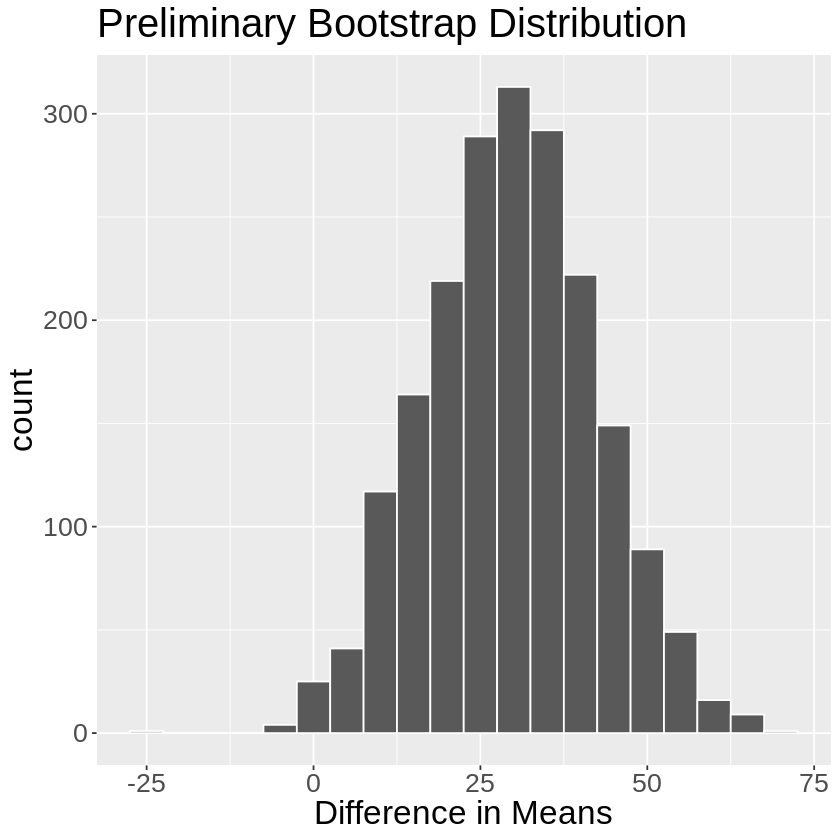

In [ ]:
# plot bootstrap distribution
btsp_dist <- btsp %>%
    ggplot() +
        geom_histogram(aes(x = stat), binwidth = 5, color = "white") +
        ggtitle("Preliminary Bootstrap Distribution") +
        xlab("Difference in Means") +
        theme(text = element_text(size = 20))

btsp_dist

*Figure 2*

### Methods

-insert methods here-

We expect to find... similar mean cholesterol levels in both men and women

Impact: 

Future questions: 


### References

-insert 2 ref here-